[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oleksis/wsl2-linux-kernel-config/blob/master/wsl2_linux_build_plot.ipynb)

<AxesSubplot:title={'center':'Linux Build Time (CPU: i3-4005u@1.70)'}, xlabel='date', ylabel='minutes'>

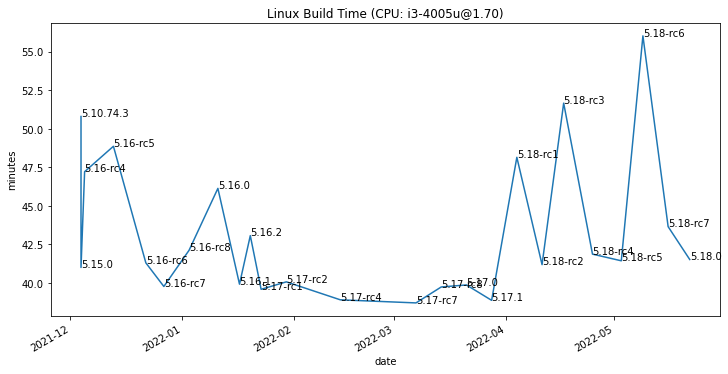

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

FILE = "build-time.csv"
URL = f"https://github.com/oleksis/wsl2-linux-kernel-config/raw/master/{FILE}"


def get_minutes(time_str):
  time_str = time.strptime(time_str, "%H:%M:%S")
  return time_str.tm_sec / 60 + time_str.tm_min


df = pd.read_csv(FILE, index_col="date", parse_dates=True)
df_time = df.elapsed.apply(get_minutes)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.set_title("Linux Build Time (CPU: i3-4005u@1.70)")
ax.set_ylabel("minutes")

for idx, tag in enumerate(df.tag):
  ax.annotate(tag, (df_time.index[idx], df_time[idx]))

df_time.plot(ax=ax)